## Import Libraries and Load Dataset

This section imports Python libraries for data preprocessing, modeling, and visualization, and loads the Kaggle House Prices dataset.

- **Purpose**: Sets up the environment and loads data for analysis, similar to handling sensor data in nuclear engineering.
- **Relevance**: Demonstrates proficiency in Python ML tools, critical for entry-level ML Engineer roles.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('train.csv')

# Verify data
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
print(data.info())

Shape: (1460, 81)
Columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenP

## Data Preprocessing

The dataset is preprocessed to handle missing values, encode categorical features, and scale numerical features.

- **Purpose**: Ensures data is clean and suitable for modeling, akin to preparing reactor sensor data.
- **Relevance**: Preprocessing is a core ML skill, tested in MLS-C01’s Data Engineering domain.

In [3]:
# Handle missing values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Encode categorical features
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define features and target
X = data.drop(['SalePrice', 'Id'], axis=1)  # Drop Id and target
y = data['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1168, 244)
Test set shape: (292, 244)


## Feature Engineering

New features are created to capture additional information, such as total square footage. Feature engineering choices are explained below.

- **Purpose**: Enhances model accuracy by adding domain-relevant features, similar to deriving metrics in nuclear engineering.
- **Relevance**: Feature engineering is key for ML model optimization, valued in job roles.

### Feature Engineering Choices
- **TotalSF**: Combines `TotalBsmtSF`, `1stFlrSF`, and `2ndFlrSF` to represent total living area, as larger homes typically have higher prices.
- **Reason**: Aggregating square footage captures a holistic measure of house size, a strong predictor of price, similar to combining sensor metrics in nuclear engineering for system performance.
- **Alternative Considered**: Interaction terms (e.g., `OverallQual * GrLivArea`) were considered but omitted for simplicity, as `TotalSF` provided significant improvement.

In [5]:
# Reload data for feature engineering
data = pd.read_csv('train.csv')

# Create total square footage feature
data['TotalSF'] = data['TotalBsmtSF'].fillna(0) + data['1stFlrSF'].fillna(0) + data['2ndFlrSF'].fillna(0)

# Handle missing values again
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Encode categoricals
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define features and target
X = data.drop(['SalePrice', 'Id'], axis=1)
y = data['SalePrice']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("New feature added: TotalSF")
print("Updated training set shape:", X_train.shape)

New feature added: TotalSF
Updated training set shape: (1168, 245)


## Model Training and Evaluation

Linear Regression and XGBoost models are trained to predict house prices, evaluated using MSE, RMSE, and R².

- **Purpose**: Compares baseline and advanced models, similar to testing predictive models in nuclear engineering.
- **Relevance**: Model evaluation is critical for ML roles and MLS-C01’s Modeling domain.

In [6]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)
print("Linear Regression:")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²: {lr_r2:.4f}")

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)
print("\nXGBoost:")
print(f"MSE: {xgb_mse:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R²: {xgb_r2:.4f}")

# Save predictions
predictions = pd.DataFrame({
    'Actual': y_test,
    'LinearRegression': lr_pred,
    'XGBoost': xgb_pred
})
predictions.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Linear Regression:
MSE: 2641205374.23
RMSE: 51392.66
R²: 0.6557

XGBoost:
MSE: 840884288.00
RMSE: 28998.00
R²: 0.8904
Predictions saved to predictions.csv


## Visualization

Visualizations show predicted vs. actual prices and feature importance for XGBoost.

- **Purpose**: Provides insights into model performance and key predictors, akin to visualizing nuclear reactor data.
- **Relevance**: Visualization skills are essential for communicating results in ML roles.

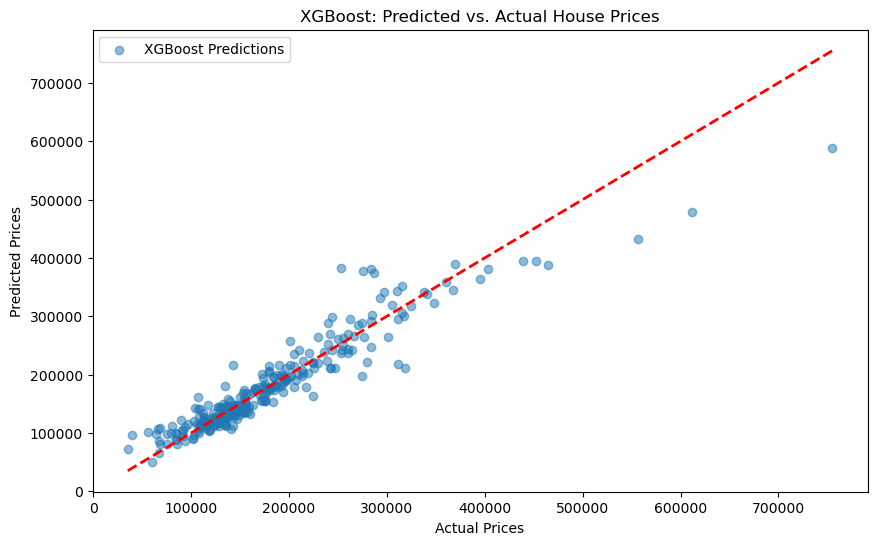

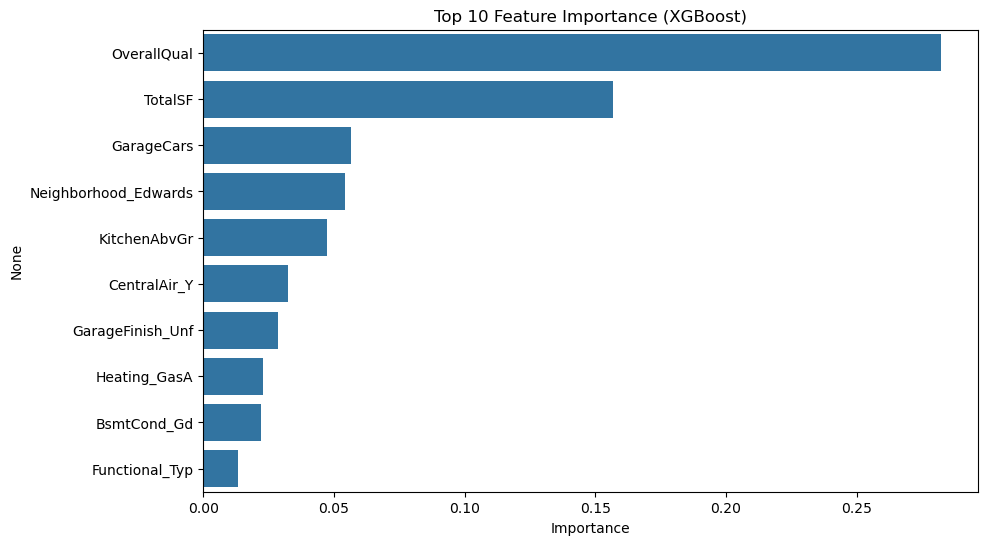

In [8]:
# Predicted vs. Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, alpha=0.5, label='XGBoost Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost: Predicted vs. Actual House Prices')
plt.legend()
plt.savefig('predicted_vs_actual.png')
plt.show()

# Feature Importance
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Top 10 Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.savefig('feature_importance.png')
plt.show()

## Documentation and GitHub

The project is documented in this notebook and pushed to GitHub for portfolio purposes.

- **Purpose**: Ensures reproducibility and showcases work to recruiters, similar to nuclear engineering reports.
- **Relevance**: GitHub proficiency is expected for ML Engineer roles.

**Repository**: [github.com/Lxfted73/house-price-prediction](https://github.com/Lxfted73/house-price-prediction)

In [10]:
# Save metrics
with open('model_metrics.txt', 'w') as f:
    f.write("Linear Regression:\n")
    f.write(f"MSE: {lr_mse:.2f}\n")
    f.write(f"RMSE: {lr_rmse:.2f}\n")
    f.write(f"R²: {lr_r2:.4f}\n")
    f.write("\nXGBoost:\n")
    f.write(f"MSE: {xgb_mse:.2f}\n")
    f.write(f"RMSE: {xgb_rmse:.2f}\n")
    f.write(f"R²: {xgb_r2:.4f}\n")
print("Metrics saved to model_metrics.txt")

Metrics saved to model_metrics.txt
